In [1]:
import pandas as pd
from fbprophet import Prophet

# データフレームの読み込み
df = pd.read_csv(r"C:\Users\hiro2\Documents\python\PythonTutorial\prophet\stockdata\9531_2013_2021.csv", encoding = 'shift-jis')
# データフレームの出力
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-01-04,401.0,408.0,400.0,406.0,13425000,2030.0
1,2013-01-07,410.0,412.0,405.0,410.0,12006000,2050.0
2,2013-01-08,412.0,414.0,409.0,414.0,12390000,2070.0
3,2013-01-09,410.0,418.0,409.0,415.0,14486000,2075.0
4,2013-01-10,417.0,421.0,412.0,413.0,19697000,2065.0
...,...,...,...,...,...,...,...
1935,2020-12-22,2280.5,2294.0,2265.0,2271.5,910400,2271.5
1936,2020-12-24,2309.5,2323.5,2299.0,2308.5,857500,2308.5
1937,2020-12-25,2300.5,2313.5,2286.0,2294.5,664100,2294.5
1938,2020-12-28,2304.0,2356.5,2302.0,2344.5,1307500,2344.5


In [2]:
# カラム名をdsとyに変更
df = df.rename(columns={'Date':'ds', 'Adj Close':'y'})
df

,ds,Open,High,Low,Close,Volume,y
0,2013-01-04,401.0,408.0,400.0,406.0,13425000,2030.0
1,2013-01-07,410.0,412.0,405.0,410.0,12006000,2050.0
2,2013-01-08,412.0,414.0,409.0,414.0,12390000,2070.0
3,2013-01-09,410.0,418.0,409.0,415.0,14486000,2075.0
4,2013-01-10,417.0,421.0,412.0,413.0,19697000,2065.0
...,...,...,...,...,...,...,...
1935,2020-12-22,2280.5,2294.0,2265.0,2271.5,910400,2271.5
1936,2020-12-24,2309.5,2323.5,2299.0,2308.5,857500,2308.5
1937,2020-12-25,2300.5,2313.5,2286.0,2294.5,664100,2294.5
1938,2020-12-28,2304.0,2356.5,2302.0,2344.5,1307500,2344.5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


'temp-plot.html'

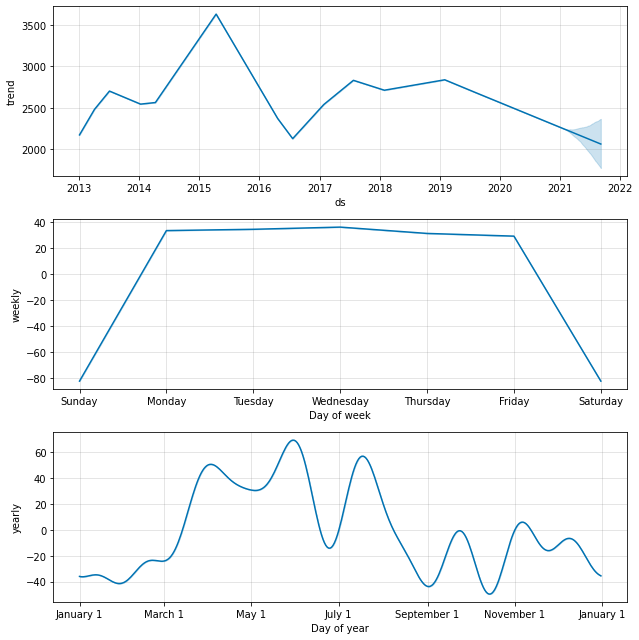

In [3]:
# Prophetのインスタンス化
m = Prophet()
# fitメソッドでデータを学習させる
m.fit(df)
# make_future_dataframeメソッドで予測分の未来のデータフレームの作成
future = m.make_future_dataframe(periods=250)
# 月曜=0,火曜=1,水曜=2,木曜=3,金曜=4,土曜=5,日曜=6
future = future[future['ds'].dt.weekday < 5]
# 予測する
forecast = m.predict(future)
# 予測結果の描画
#fig1 = m.plot(forecast)
# トレンド、周期性の描画
fig2 = m.plot_components(forecast)
# plotlyを使って描画
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig1 = plot_plotly(m, forecast)
py.plot(fig1)